# Meta Stock Analysis # 
Yooo welcome!!! The goal of this project is to conduct fundamental and quantitative analysis on META stock to determine optimal prices to buy and sell stock. 
The reason why I'm deciding to do this is because I ended up buying a few shares of META 6 months ago without much research and analysis. Turns out that was a bad idea and the stock has lost more than half its value since then. So this is kind of redemption for me, to see if I have what it takes to actually be able make a somewhat educated decision when buying a stock heheh

## This Project is going to be broken down into a few sections: ##

### Part 1: Fundamentals ###
    - Financial Statement Analysis 
    - Industry/Competitor Analysis
    
### Part 2: Quantitative ###
    - Moving average
    - Trading algorithim 

### Notes ###
Before we dive into to any analysis I want to mention the libraries I'm using to help support this project. For all my financial data I'm making API calls to Financial Modeling Prep 

In [37]:
## JSON Parser provided by FMP ##

try:
    # For Python 3.0 or later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive content of ``url``, parse it as JSON and return the object.
    
    Parameters
    ----------
    url : str
    
    Returns
    -------
    dict
    """
    
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [38]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date 
import requests
from urllib.request import urlopen
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams["figure.figsize"] = (20, 10)

# Part 1: Fundamental Analysis #
## Financials ##
Before we even look at stock prices lets start with 3 basic financial statements: Income Statement, Balance Sheet, and the Statement of Cash Flows

In [40]:
## Annual Data ##
balance_sheet_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
income_statement_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/income-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
cash_statement_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
## Quarterly Data ##
balance_sheet_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")
income_statement_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/income-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")
cash_statement_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")

/tmp/ipykernel_50/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



In [41]:
balance_sheet_annual.reverse()
income_statement_annual.reverse()
cash_statement_annual.reverse()
balance_sheet_quarter.reverse()
income_statement_quarter.reverse()
cash_statement_quarter.reverse()

Alright so out of the 3 statements I'm gonna start with cash flow because at a basic level I'm interested to see how META spends it's money. The first thing I'm going to look at is free cash flow, 

In [63]:
industry = get_jsonparsed_data("https://financialmodelingprep.com/api/v4/industry_price_earning_ratio?date=2022-05-07&exchange=NYSE&apikey=d4277832337026f8e79417143061c25c")
industry

/tmp/ipykernel_50/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



[]

In [42]:
## get Cash From Operating Acitivites
## net Change in cash
## Operating Cash flow
## freeCashFlow


total_years = len(cash_statement_annual)

date = []
years = []
cash_from_operating_activities = []
net_change_in_cash = []
free_cash_flow = []
operating_cash_flow = []

for year in cash_statement_annual:
    date.append(year['date'])
    years.append(year['calendarYear'])
    cash_from_operating_activities.append(year['netCashProvidedByOperatingActivities'])
    net_change_in_cash.append(year['netChangeInCash'])
    free_cash_flow.append(year['freeCashFlow'])


cash_flow = {
    'years':years,
    'free_cash_flow':free_cash_flow,
    'net_change_in_cash':net_change_in_cash,
    'cash_from_operating_activities':cash_from_operating_activities
}
print(cash_flow)

{'years': ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 'free_cash_flow': [377000000, 2860000000, 3626000000, 6076000000, 11617000000, 17483000000, 15359000000, 21212000000, 23632000000, 39116000000], 'net_change_in_cash': [872000000, 939000000, 992000000, 592000000, 3996000000, -824000000, 1920000000, 9155000000, -1325000000, -1089000000], 'cash_from_operating_activities': [1612000000, 4222000000, 5457000000, 8599000000, 16108000000, 24216000000, 29274000000, 36314000000, 38747000000, 57683000000]}


so for the past 5 years lets see how the trends with free cash flow

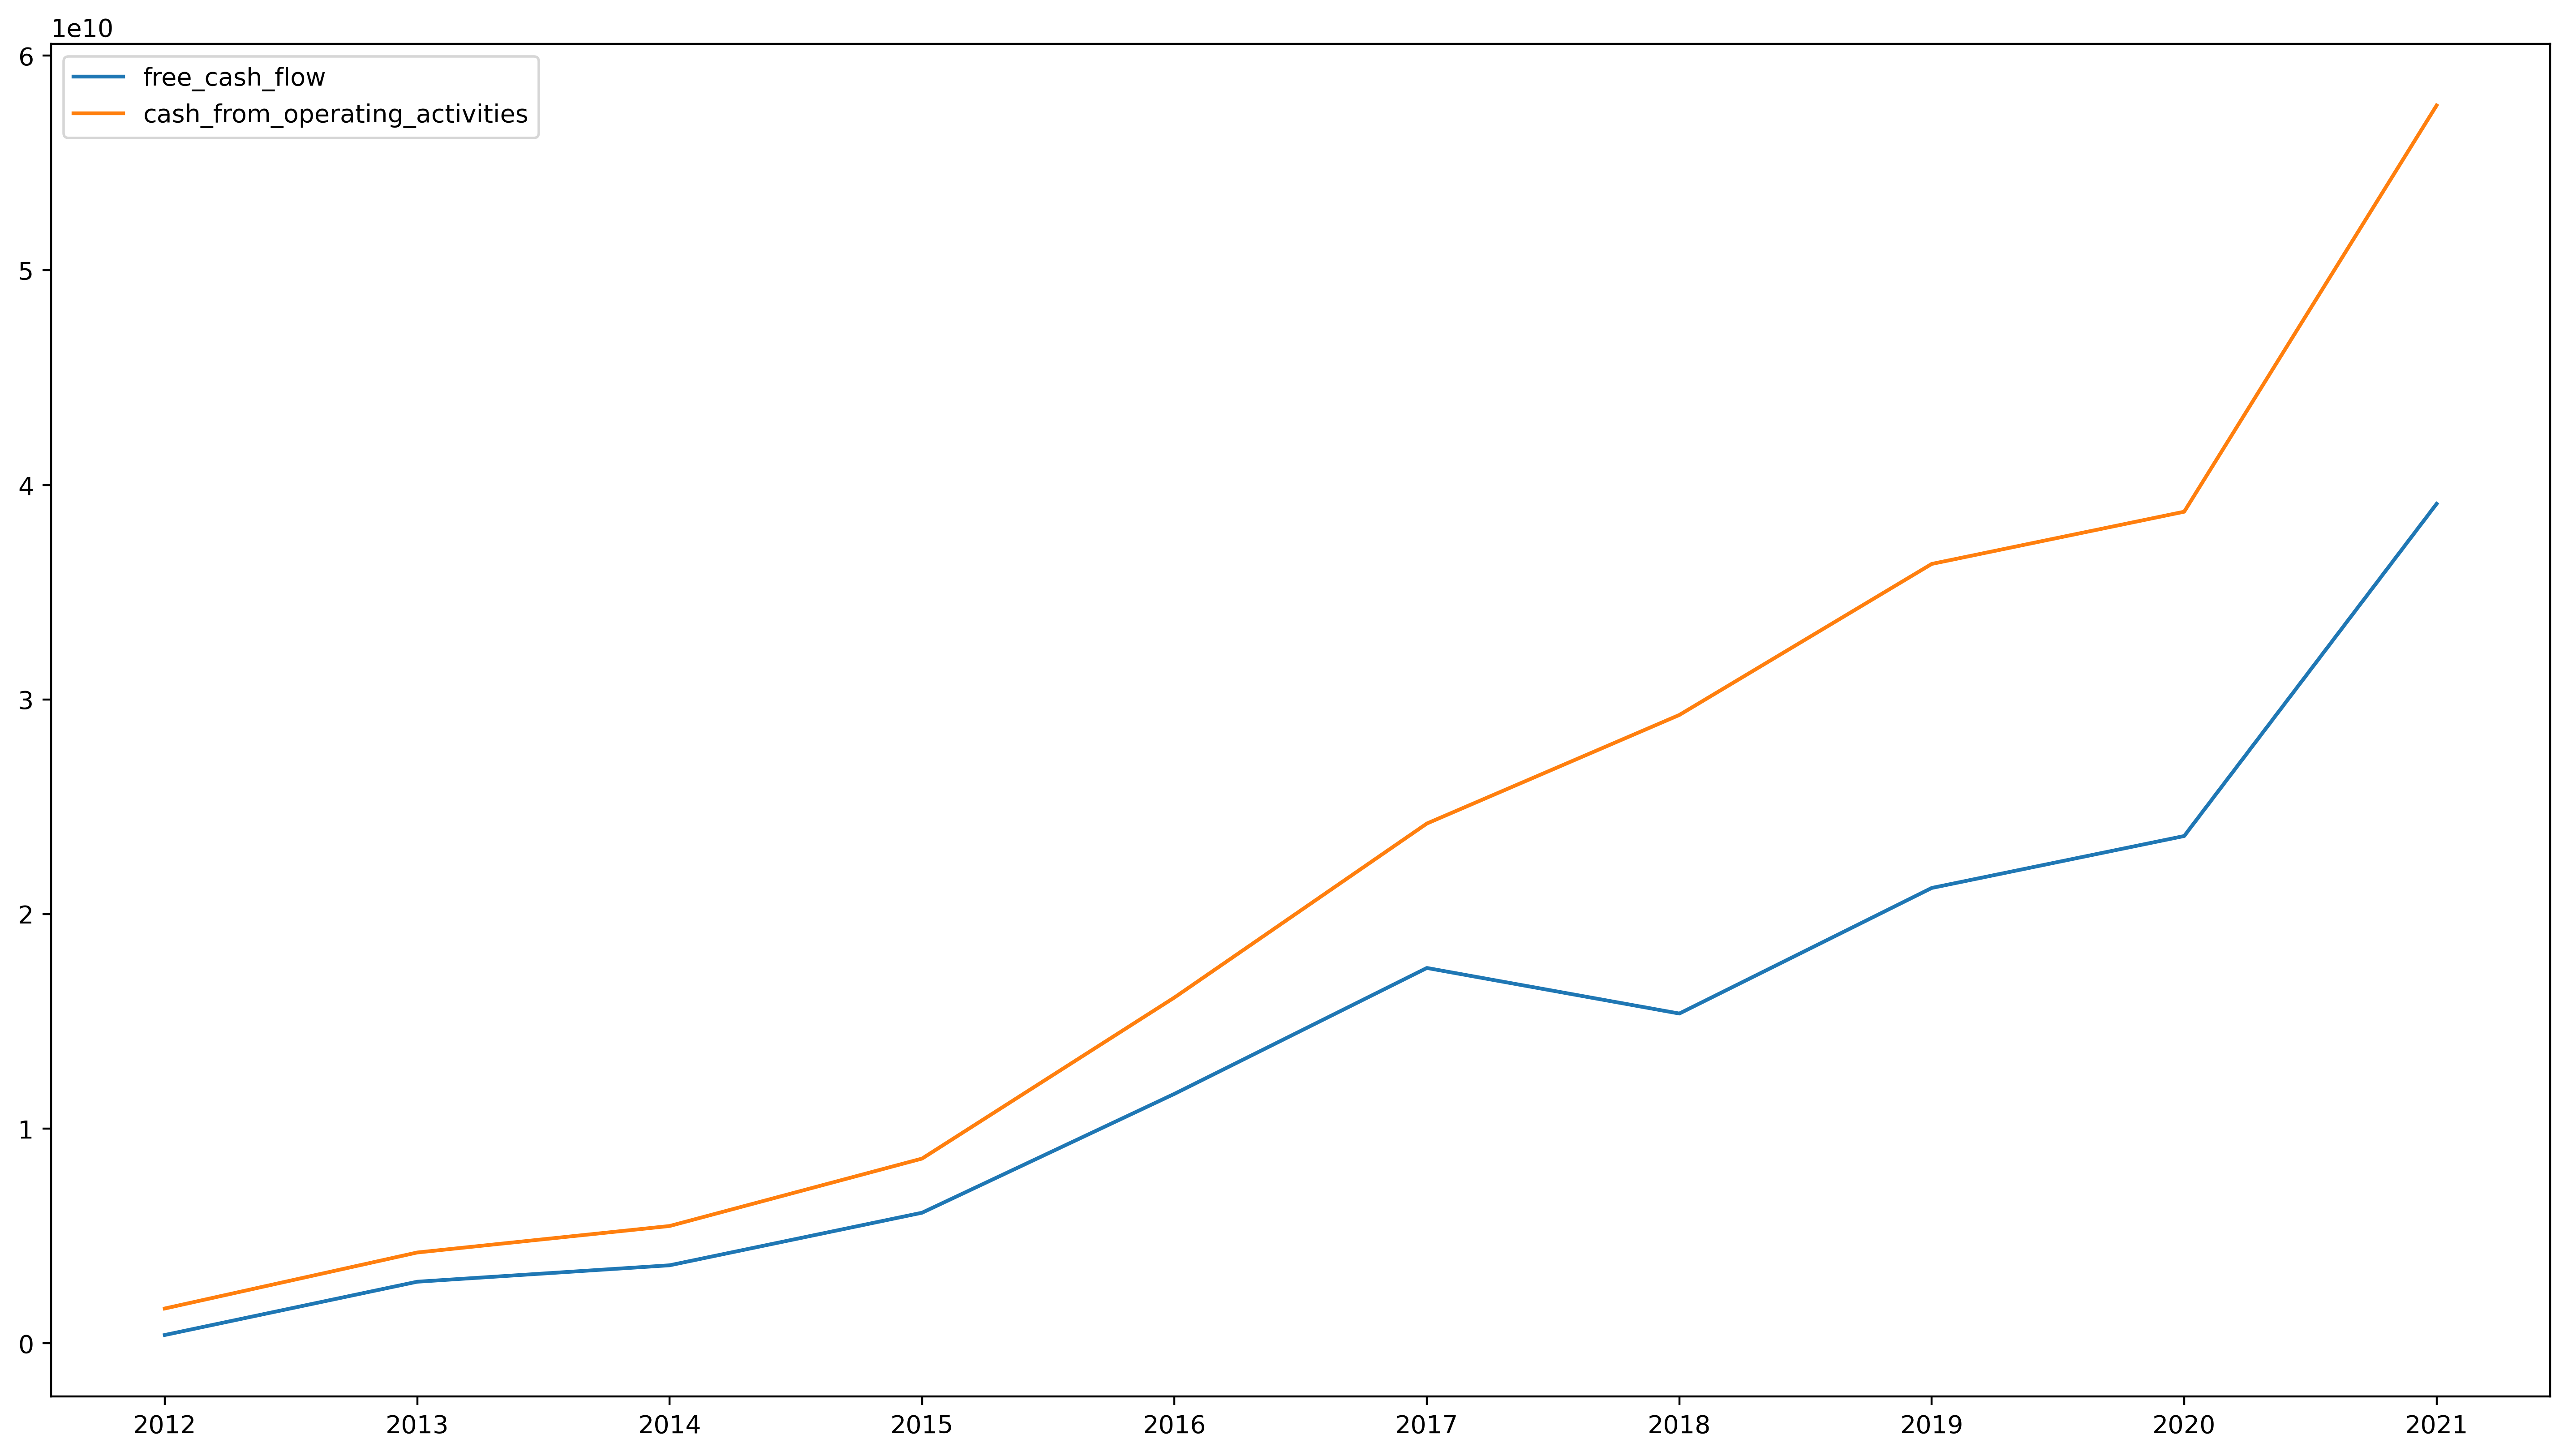

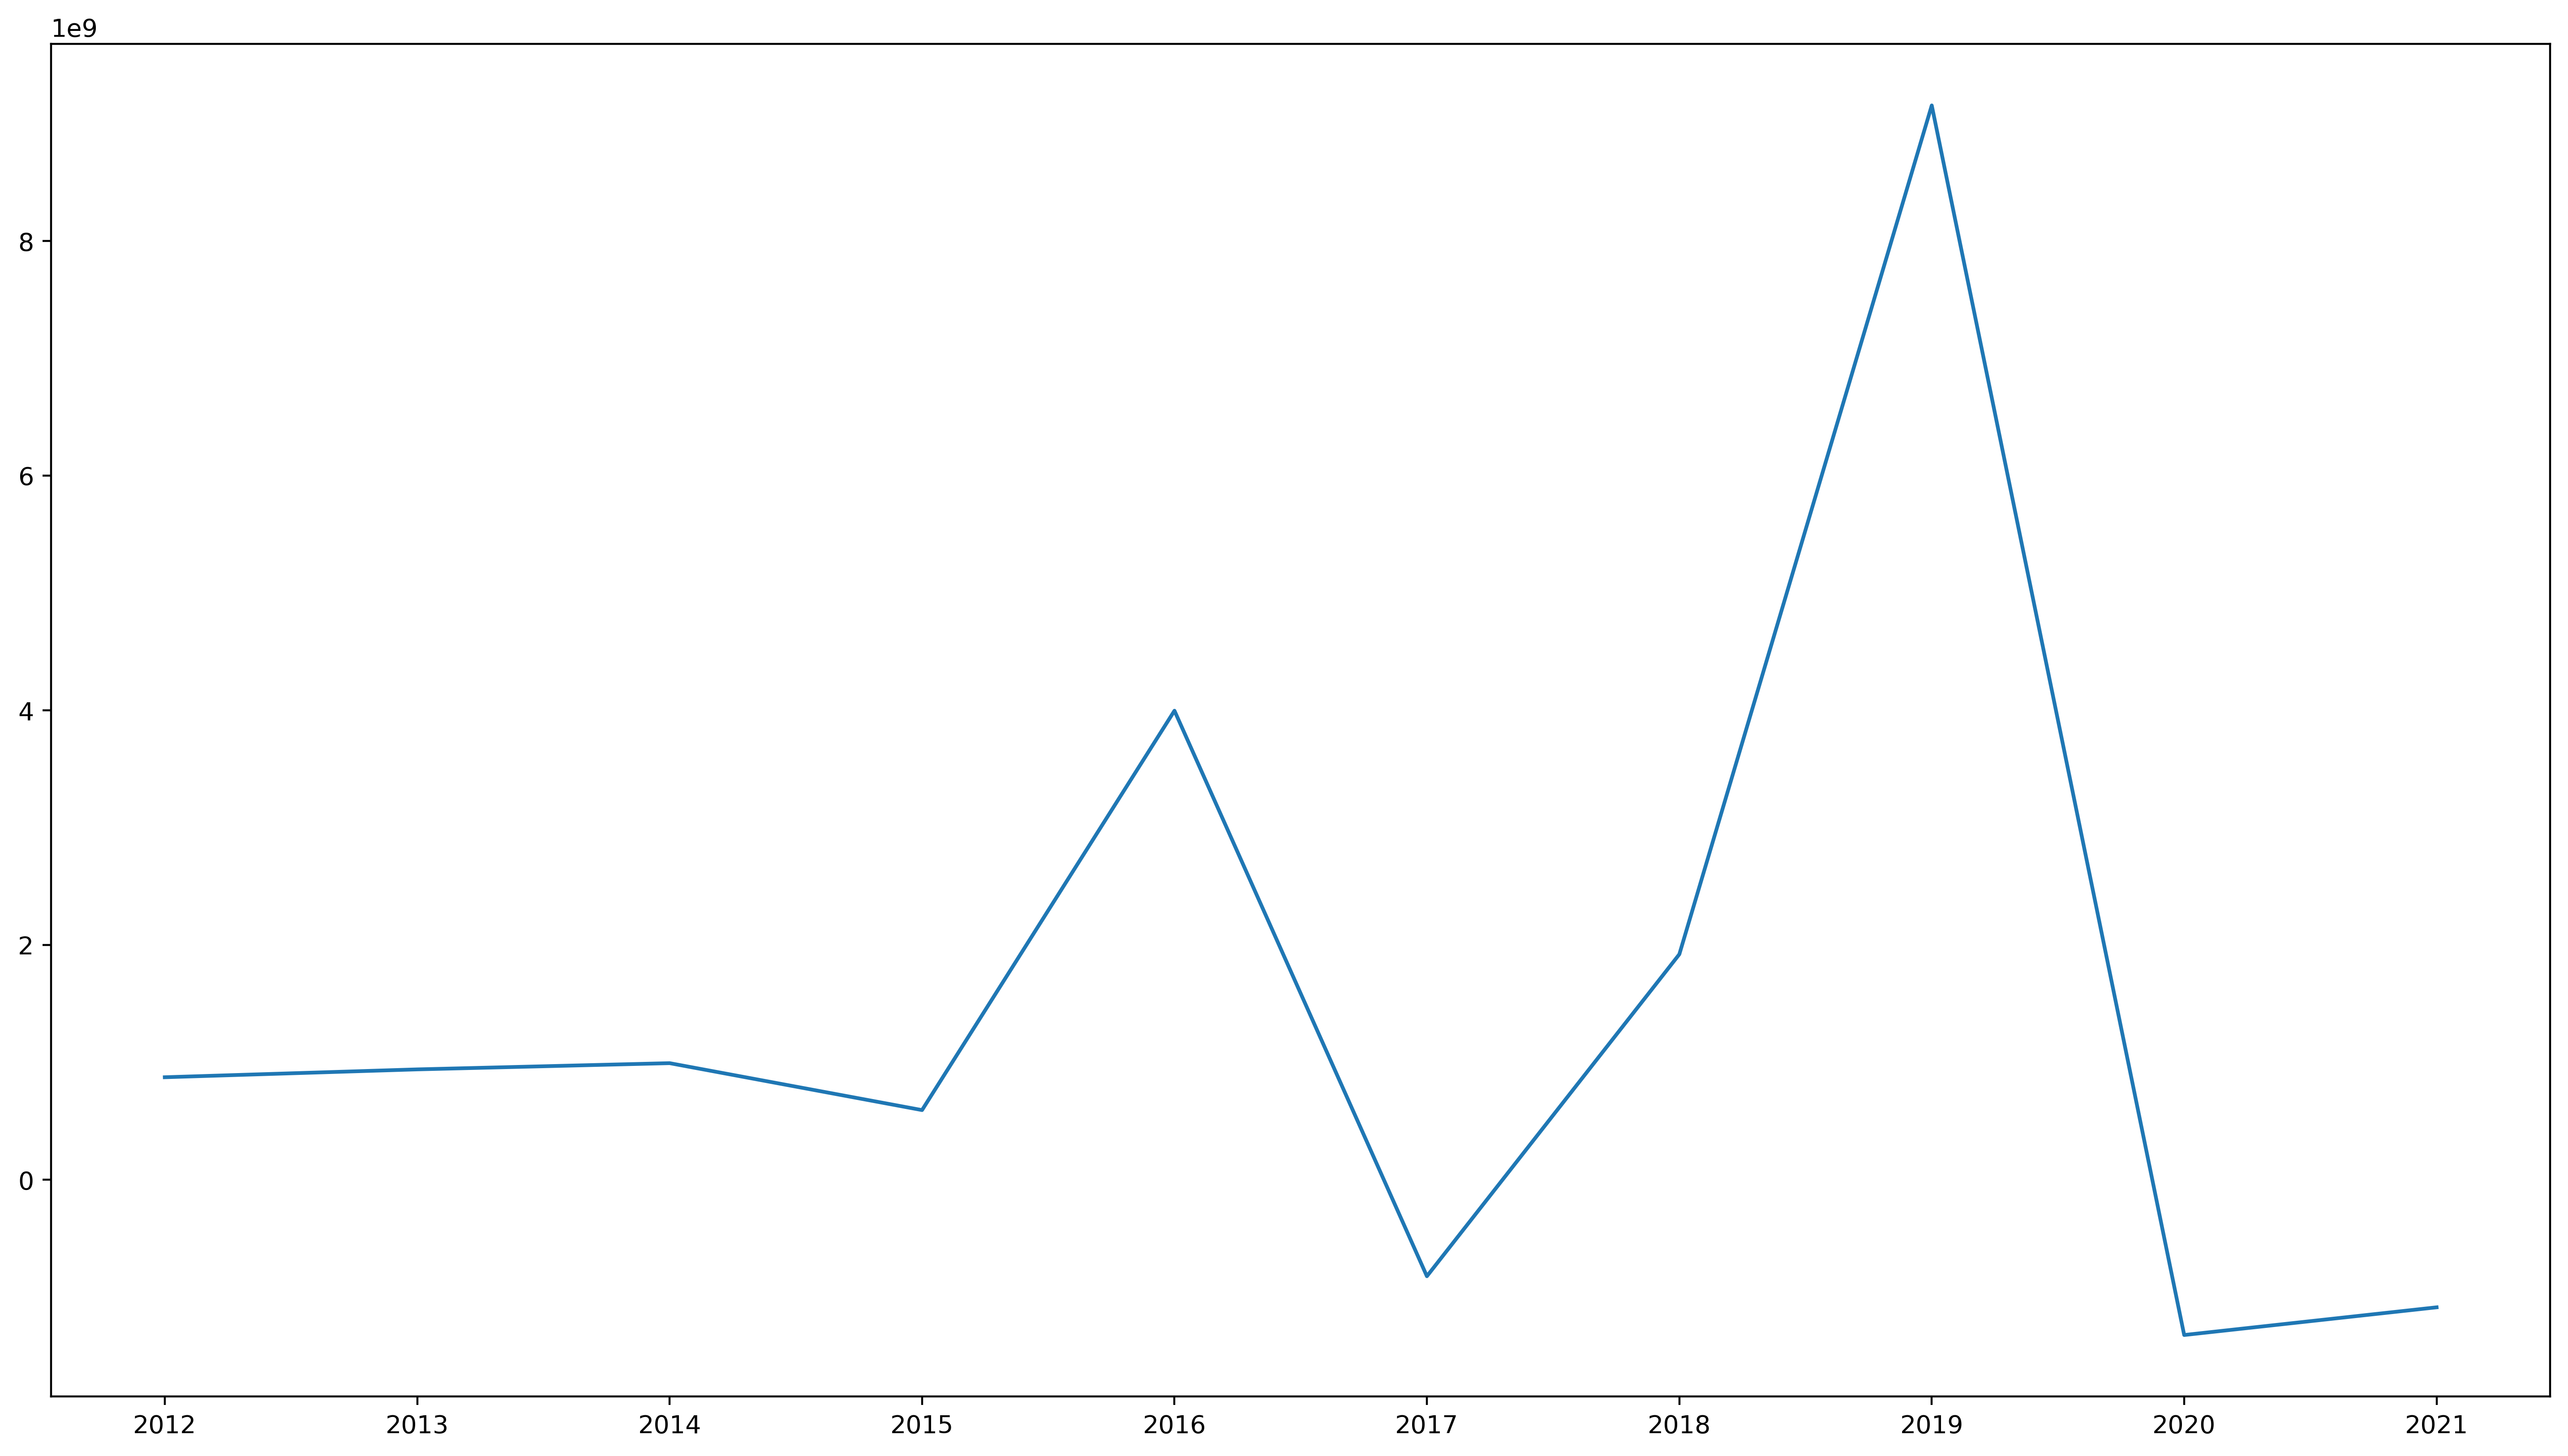

In [43]:
df = pd.DataFrame.from_dict(cash_flow)
fig, ax = plt.subplots(figsize = (18, 10))

ax.plot('years', 'free_cash_flow', data=cash_flow)
ax.plot('years', 'cash_from_operating_activities', data=cash_flow)
ax.legend()
fig, ax = plt.subplots(figsize = (18,10))
ax.plot('years', 'net_change_in_cash', data=cash_flow)

From here we can plot some of the historical pricing data and see how the price of META stock has changed in the past five years

In [44]:
date = []
years = []
cash_from_operating_activities = []
net_change_in_cash = []
free_cash_flow = []
operating_cash_flow = []

for year in cash_statement_quarter:
    date.append(year['date'])
    years.append(year['calendarYear'])
    cash_from_operating_activities.append(year['netCashProvidedByOperatingActivities'])
    net_change_in_cash.append(year['netChangeInCash'])
    free_cash_flow.append(year['freeCashFlow'])


cash_flow = {
    'years':years,
    'date':date,
    'free_cash_flow':free_cash_flow,
    'net_change_in_cash':net_change_in_cash,
    'cash_from_operating_activities':cash_from_operating_activities
}

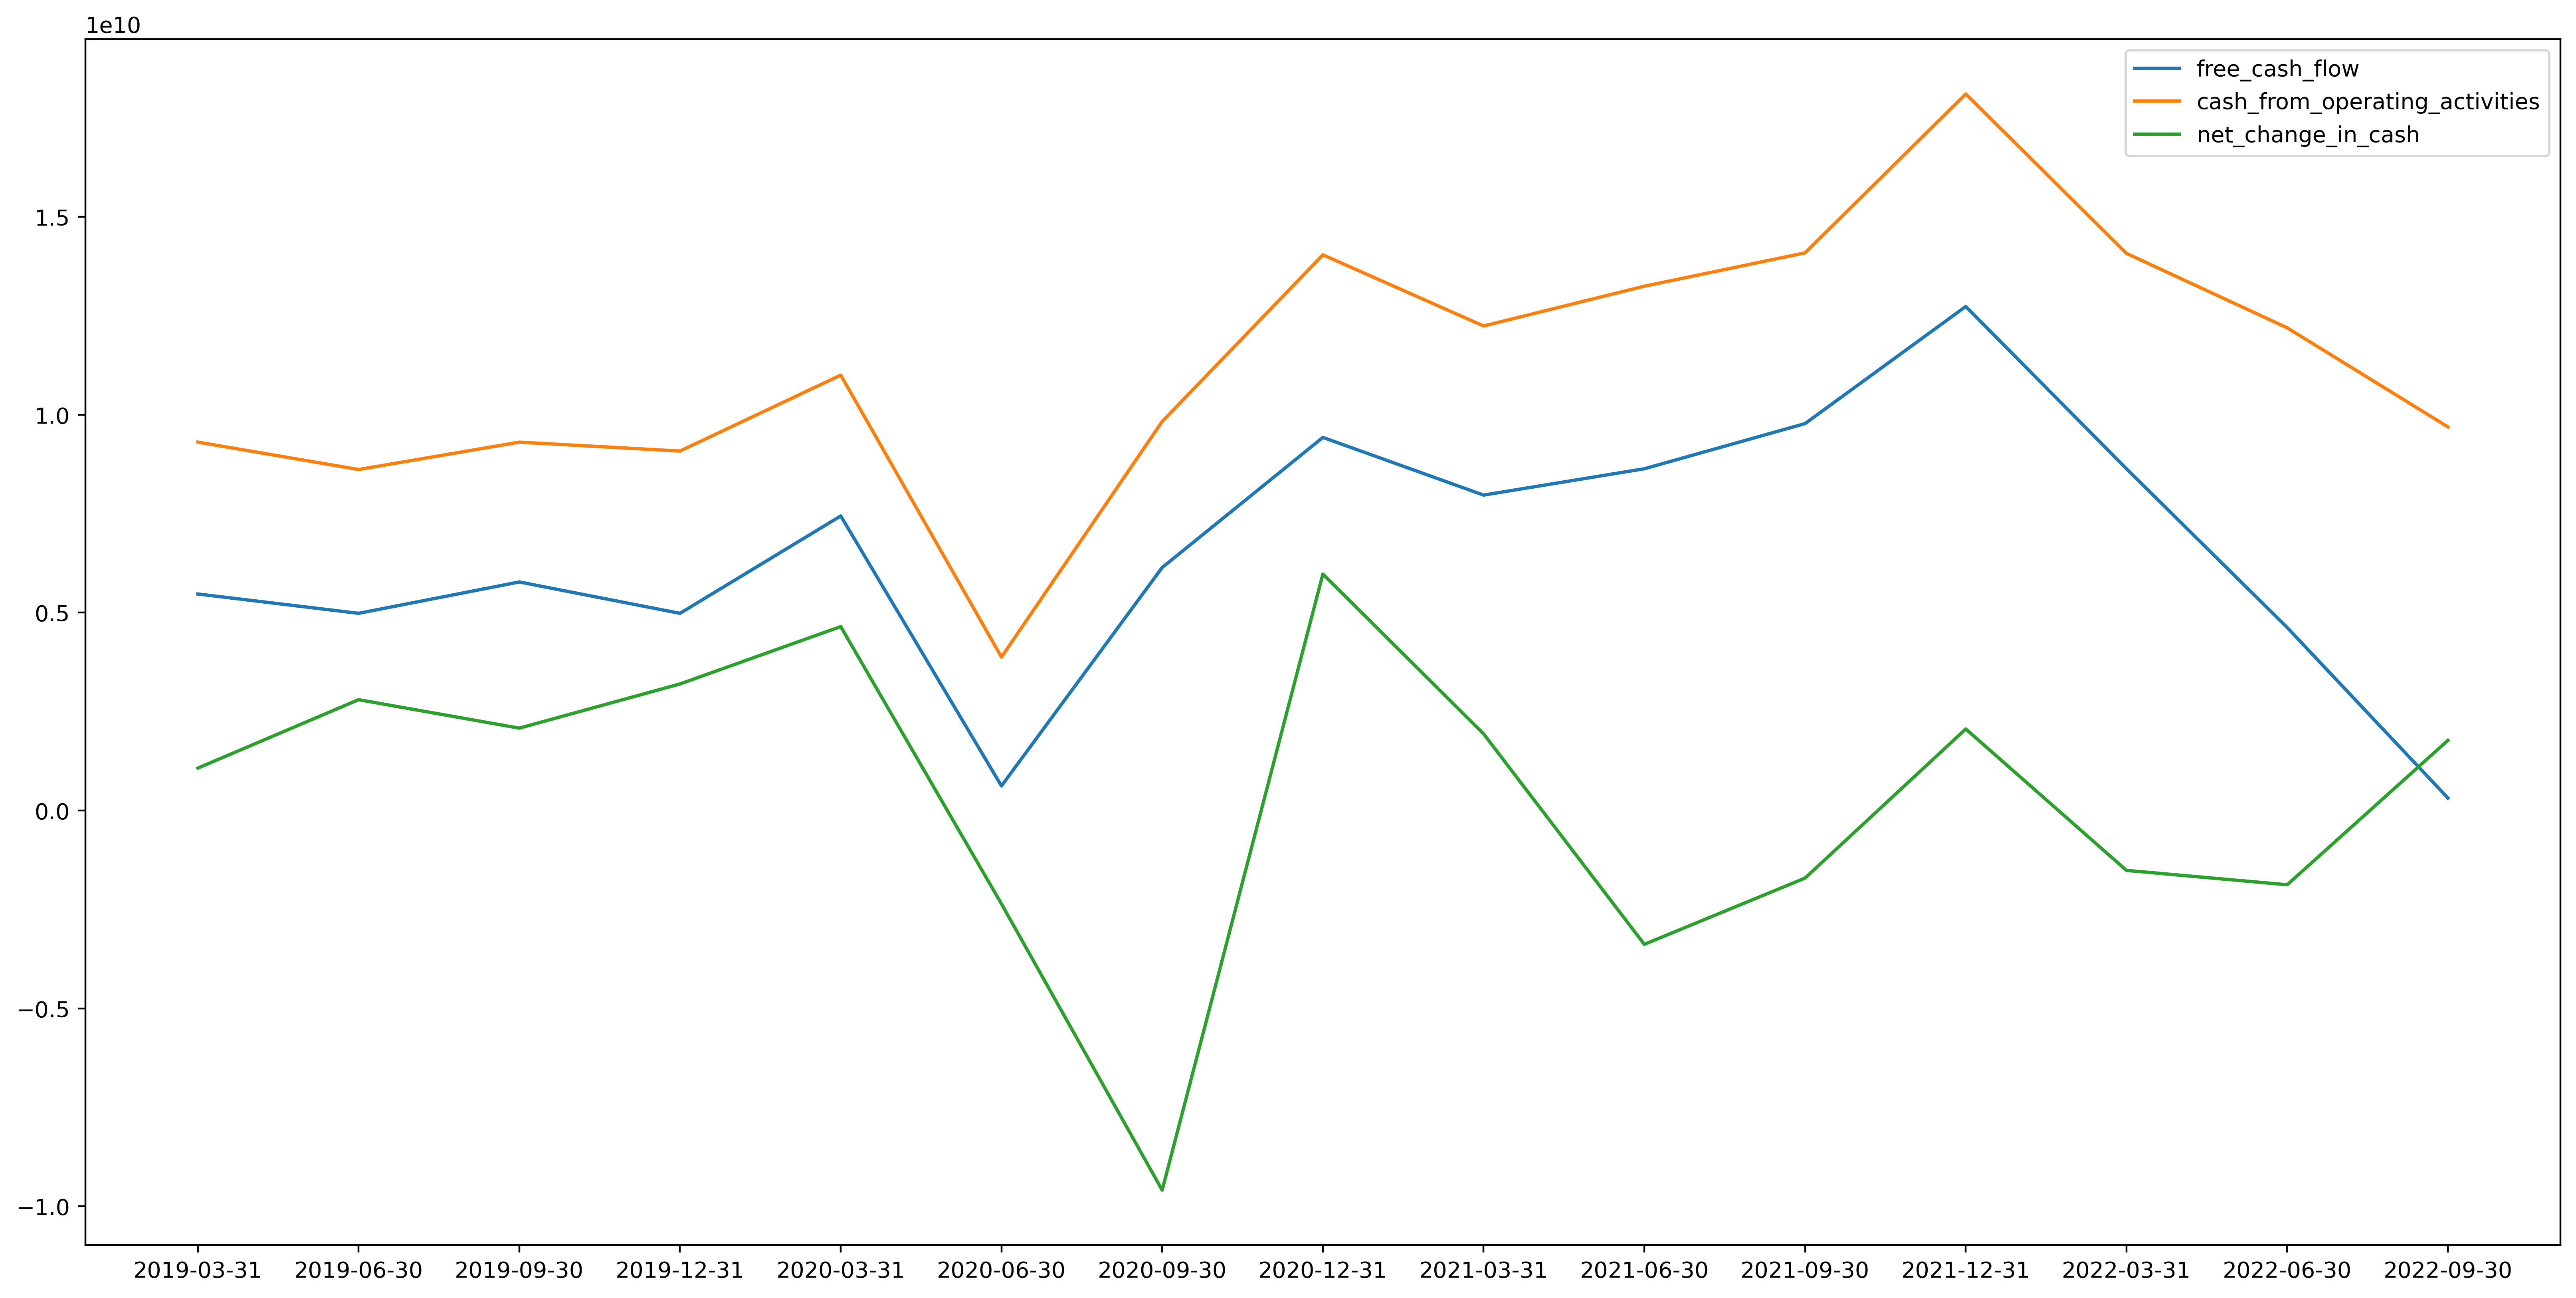

In [45]:
df = pd.DataFrame.from_dict(cash_flow)
fig, ax = plt.subplots()

ax.plot('date', 'free_cash_flow', data=cash_flow)
ax.plot('date', 'cash_from_operating_activities', data=cash_flow)
ax.plot('date', 'net_change_in_cash', data=cash_flow)
ax.legend()

In [46]:
df

,years,date,free_cash_flow,net_change_in_cash,cash_from_operating_activities
0,2019,2019-03-31,5471000000,1073000000,9308000000
1,2019,2019-06-30,4983000000,2801000000,8616000000
2,2019,2019-09-30,5775000000,2082000000,9307000000
3,2019,2019-12-31,4983000000,3199000000,9083000000
4,2020,2020-03-31,7443000000,4648000000,11001000000
5,2020,2020-06-30,622000000,-2358000000,3877000000
6,2020,2020-09-30,6140000000,-9590000000,9829000000
7,2020,2020-12-31,9427000000,5975000000,14040000000
8,2021,2021-03-31,7970000000,1937000000,12242000000
9,2021,2021-06-30,8635000000,-3380000000,13247000000


In [47]:
years = []
cash = []
current_assets = []
total_assets = []
current_liabilities = []
total_liabilities = []
debt = []
retained_earnings = []



for year in balance_sheet_annual:
    years.append(year['calendarYear'])
    cash.append(year['cashAndCashEquivalents'])
    current_assets.append(year['totalCurrentAssets'])
    total_assets.append(year['totalAssets'])
    current_liabilities.append(year['totalCurrentLiabilities'])
    total_liabilities.append(year['totalLiabilities'])
    debt.append(year['totalDebt'])
    retained_earnings.append(year['retainedEarnings'])


balance_sheet_data = {
    'years': years,
    'debt': debt,
    'current_assests': current_assets,
    'total_assets': total_assets,
    'current_liabilities': current_liabilities,
    'debt': debt,
    'retained_earnings': retained_earnings
}
print(debt)
                
balance_sheet_df = pd.DataFrame.from_dict(balance_sheet_data)
balance_sheet_df

[2356000000, 476000000, 233000000, 315000000, 0.0, 0.0, 500000000, 10601000000, 10654000000, 13873000000]


,years,debt,current_assests,total_assets,current_liabilities,retained_earnings
0,2012,2.356000e+09,11267000000,15103000000,1052000000,1659000000
1,2013,4.760000e+08,13070000000,17895000000,1100000000,3159000000
2,2014,2.330000e+08,13670000000,40184000000,1424000000,6099000000
3,2015,3.150000e+08,21652000000,49407000000,1925000000,9787000000
4,2016,0.000000e+00,34401000000,64961000000,2875000000,21670000000
5,2017,0.000000e+00,48563000000,84524000000,3760000000,33990000000
6,2018,5.000000e+08,50480000000,97334000000,7017000000,41981000000
7,2019,1.060100e+10,66225000000,133376000000,15053000000,55692000000
8,2020,1.065400e+10,75670000000,159316000000,14981000000,77345000000
9,2021,1.387300e+10,66666000000,165987000000,21135000000,69761000000


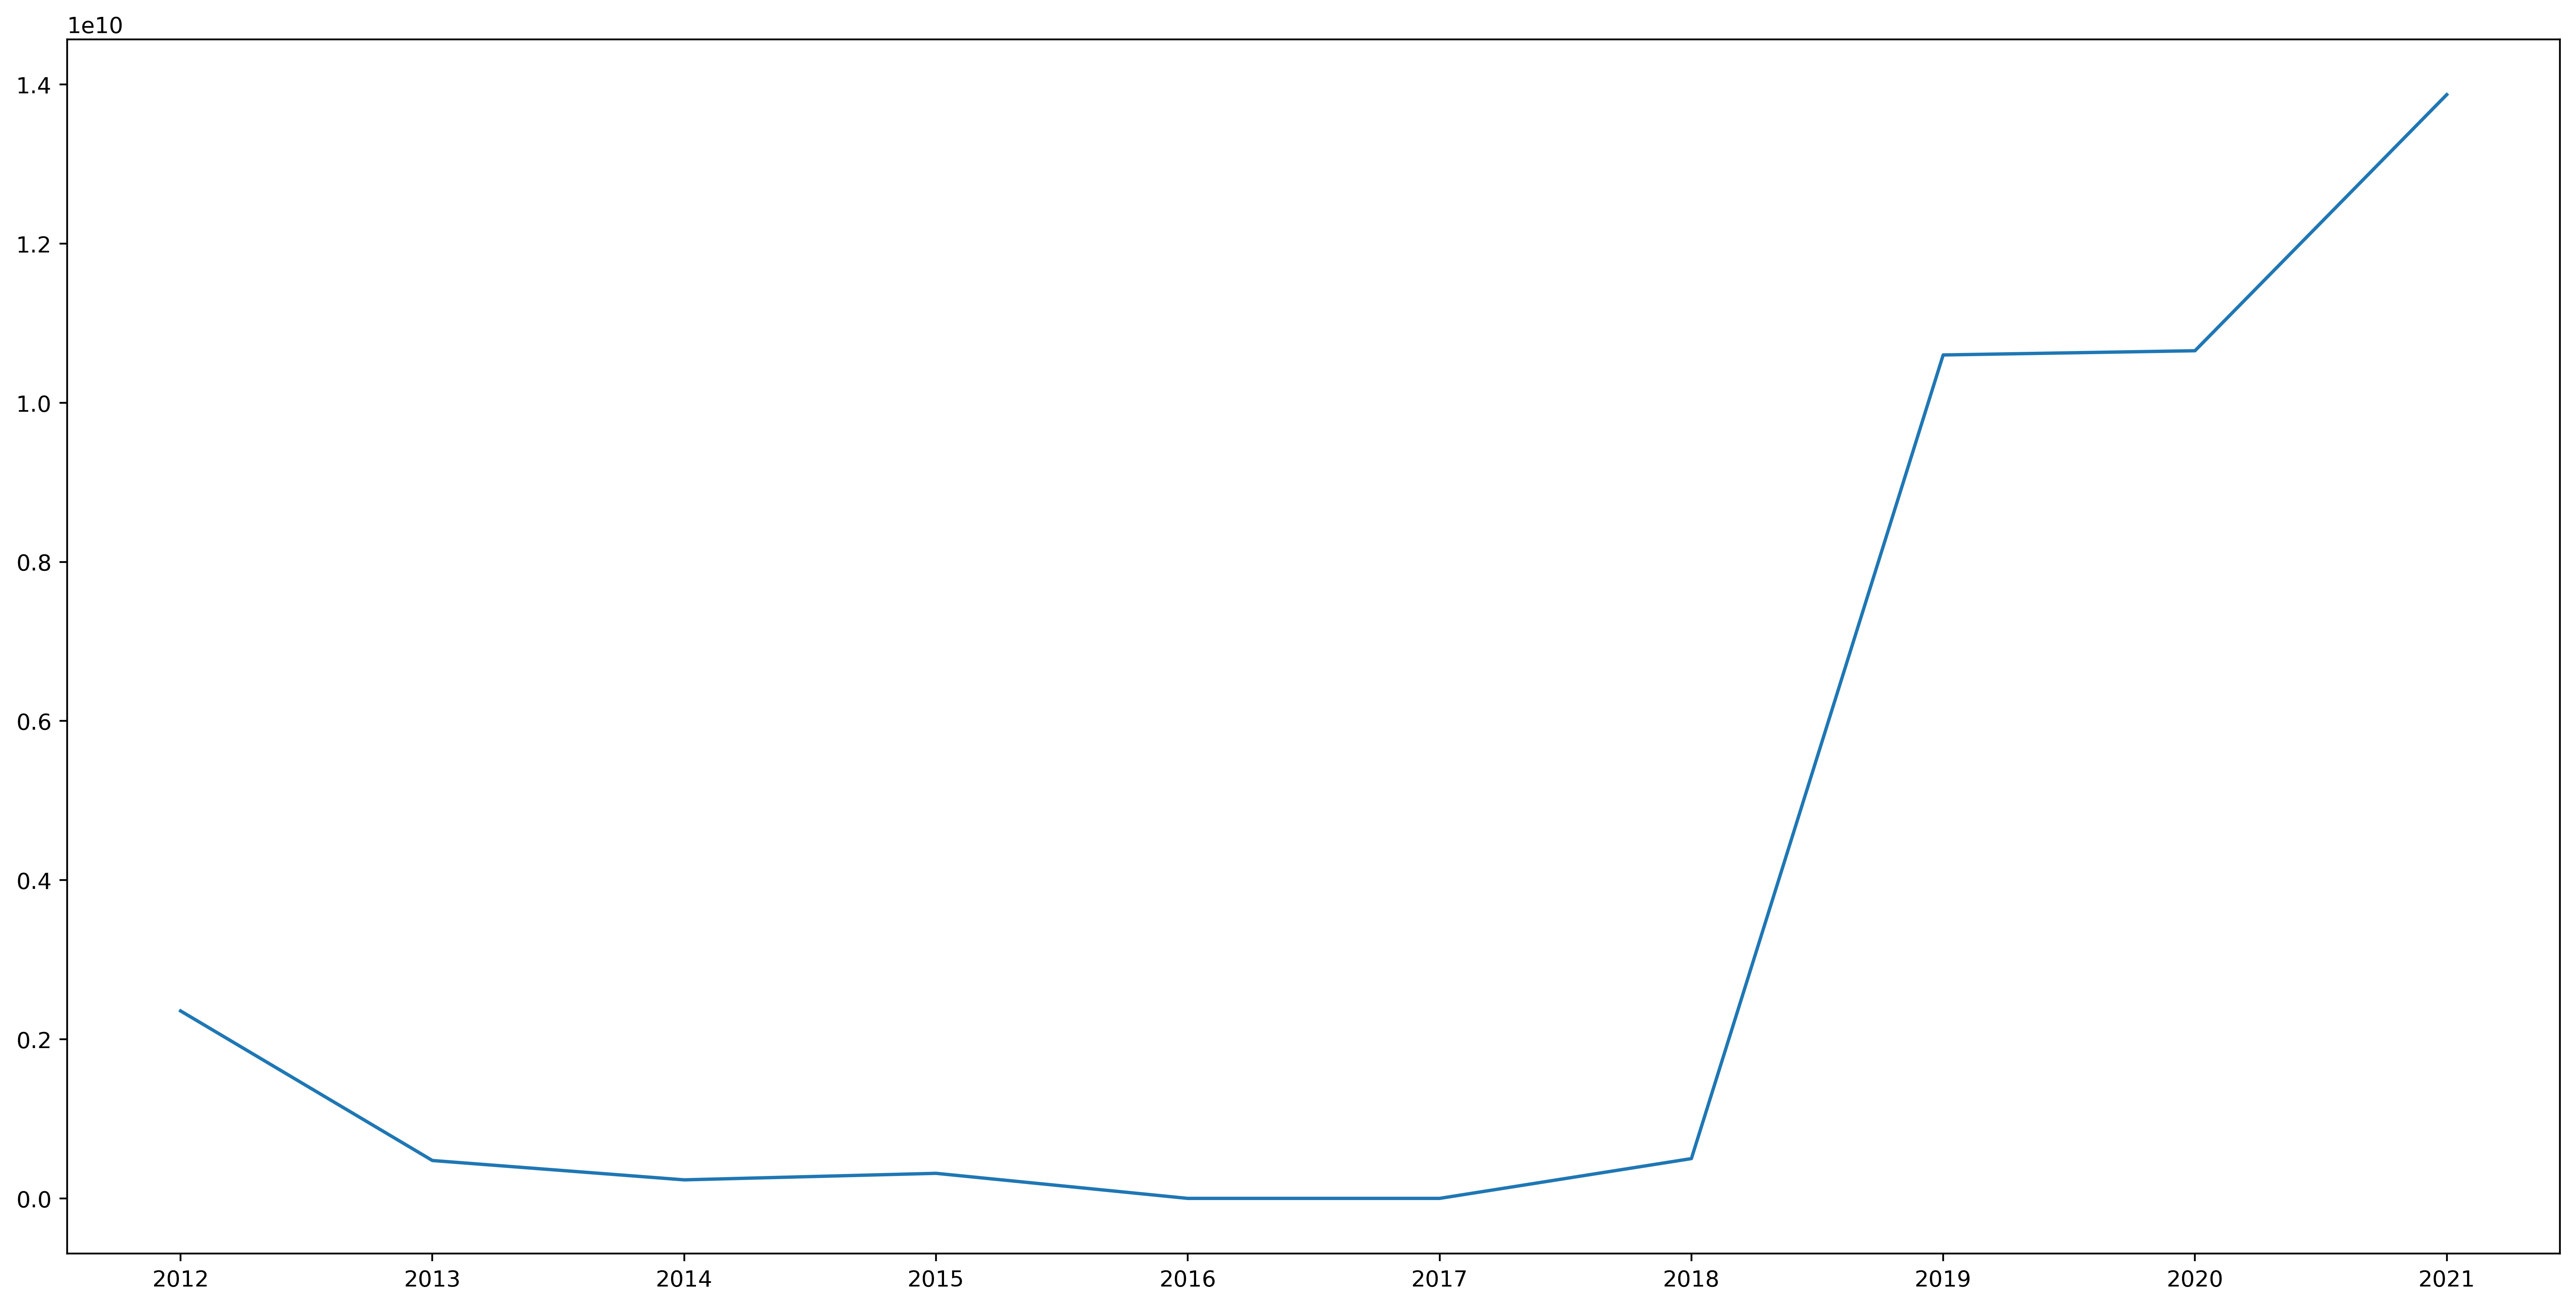

In [48]:
fig, ax = plt.subplots()
ax.plot('years', 'debt', data=balance_sheet_df)

Income Statement Analysis

In [49]:
revenue = []
gross_profit = []
gross_profit_ratio = []
rd_expense = []
ebitda = []
ebitda_ratio = []
net_income = []
net_income_ratio = []
eps = []

for year in income_statement_annual:
    revenue.append(year['revenue'])
    gross_profit.append(year['grossProfit'])
    gross_profit_ratio.append(year['grossProfitRatio'])
    rd_expense.append(year['researchAndDevelopmentExpenses'])
    ebitda.append(year['ebitda'])
    ebitda_ratio.append(year['ebitdaratio'])
    net_income.append(year['netIncome'])
    net_income_ratio.append(year['netIncomeRatio'])
    eps.append(year['eps'])
    
    
income_statement_data = {
    'years': years,
    'revenue': revenue,
    'gross_profit': gross_profit,
    'gross_profit_ratio': gross_profit_ratio,
    'rd_expense': rd_expense,
    'ebitda': ebitda,
    'ebitda_ratio': ebitda_ratio,
    'net_income': net_income,
    'net_income_ratio': net_income_ratio,
    'eps': eps
}

income_statement_df = pd.DataFrame.from_dict(income_statement_data)
income_statement_df

,years,revenue,gross_profit,gross_profit_ratio,rd_expense,ebitda,ebitda_ratio,net_income,net_income_ratio,eps
0,2012,5089000000,3725000000,0.731971,1399000000,1194000000,0.234624,53000000,0.010415,0.02
1,2013,7872000000,5997000000,0.761814,1415000000,3821000000,0.485391,1500000000,0.190549,0.62
2,2014,12466000000,10313000000,0.827290,2666000000,6176000000,0.495428,2940000000,0.235841,1.12
3,2015,17928000000,15061000000,0.840083,4816000000,8162000000,0.455266,3688000000,0.205712,1.31
4,2016,27638000000,23849000000,0.862906,5919000000,14870000000,0.538027,10217000000,0.369672,3.56
5,2017,40653000000,35199000000,0.865840,7754000000,23625000000,0.581138,15934000000,0.391951,5.49
6,2018,55838000000,46483000000,0.832462,10273000000,29685000000,0.531627,22112000000,0.396003,7.65
7,2019,70697000000,57927000000,0.819370,13600000000,30573000000,0.432451,18485000000,0.261468,6.48
8,2020,85965000000,69273000000,0.805828,18447000000,40714000000,0.473611,29146000000,0.339045,10.22
9,2021,117929000000,95280000000,0.807944,24655000000,55712000000,0.472420,39370000000,0.333845,13.99


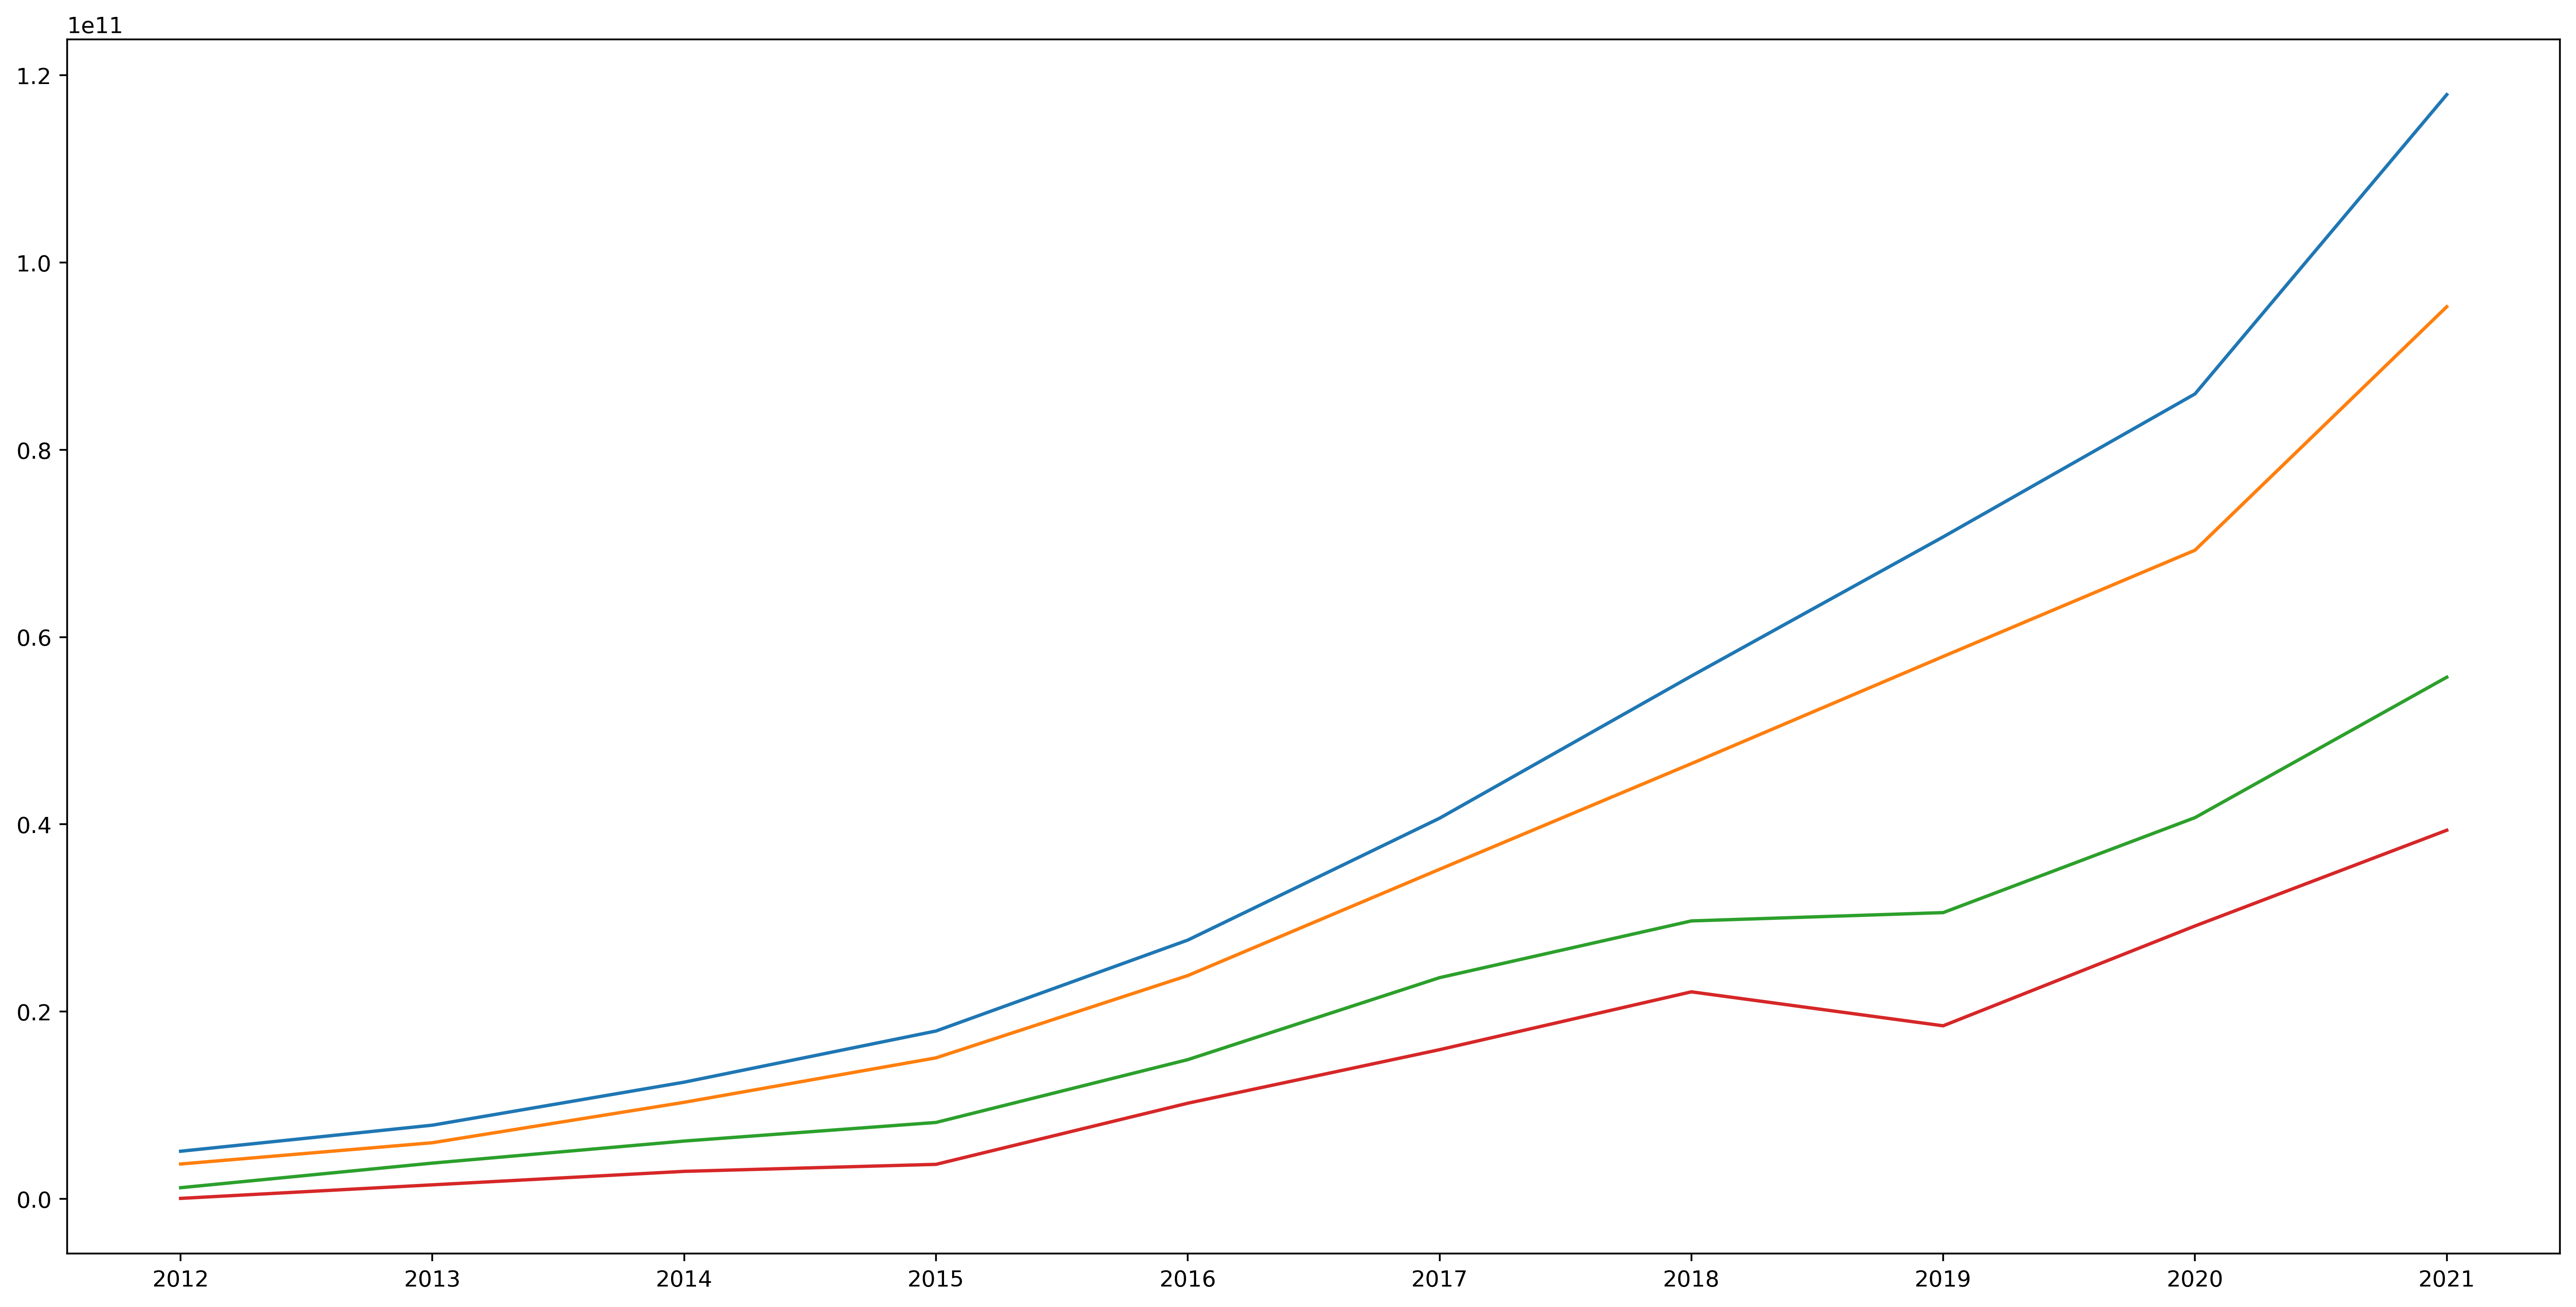

In [50]:
fig, ax = plt.subplots()
ax.plot('years', 'revenue', data=income_statement_df)
ax.plot('years', 'gross_profit', data=income_statement_df)
ax.plot('years', 'ebitda', data=income_statement_df)
ax.plot('years', 'net_income', data=income_statement_df)

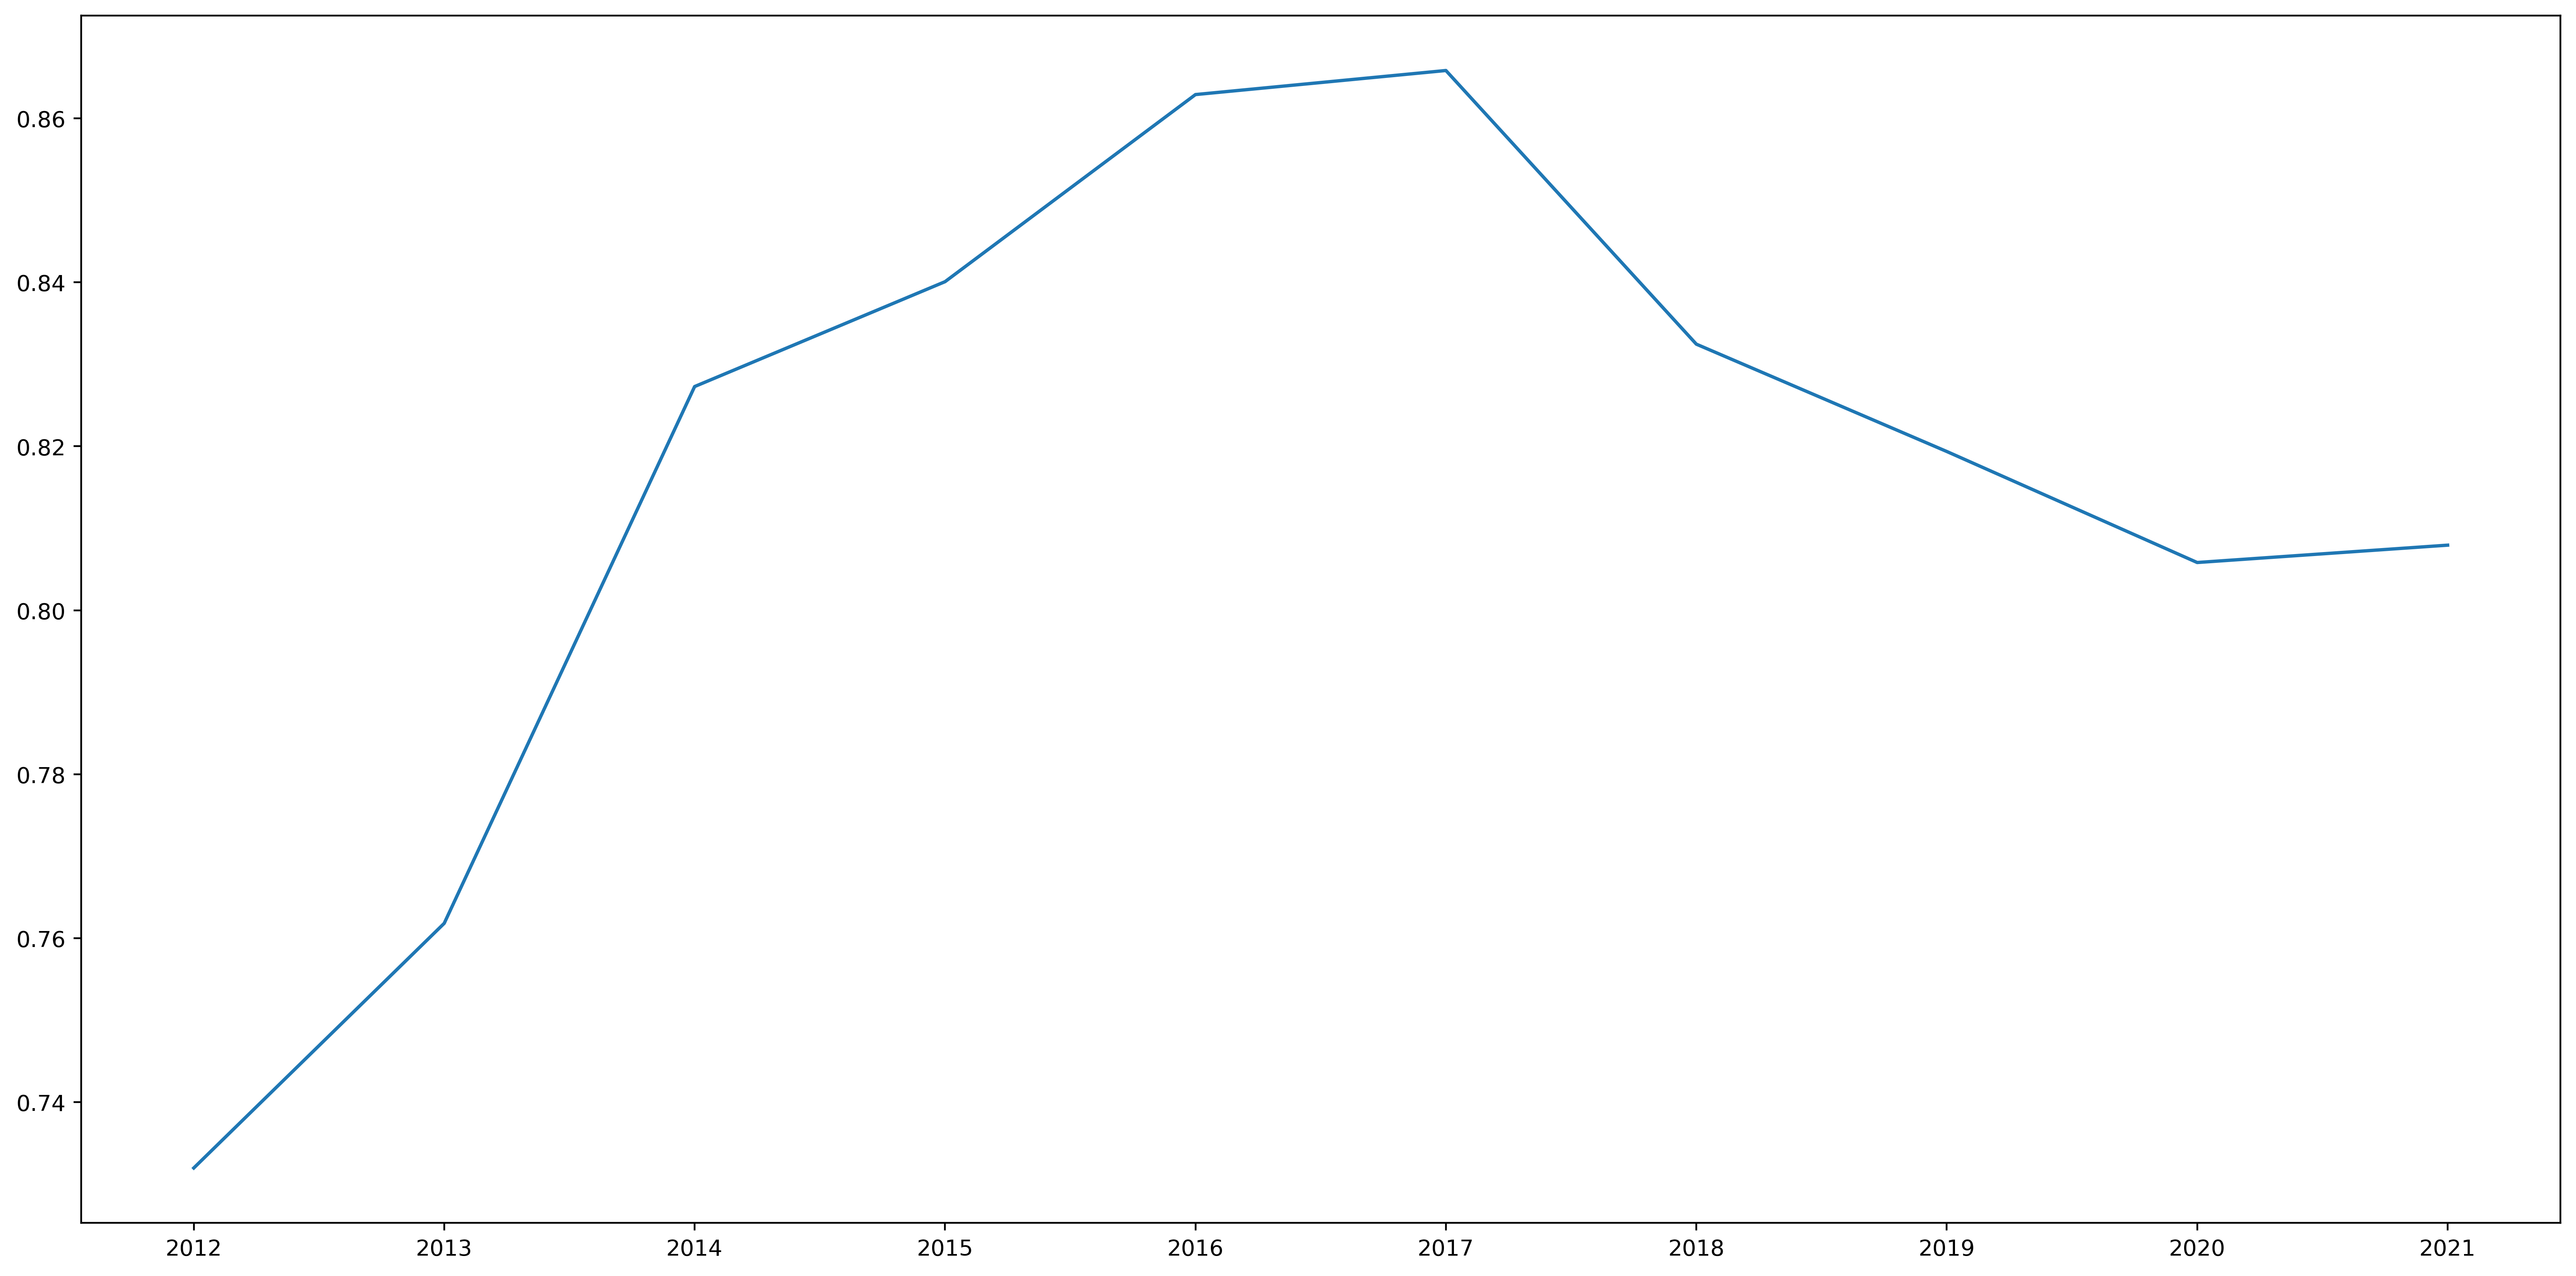

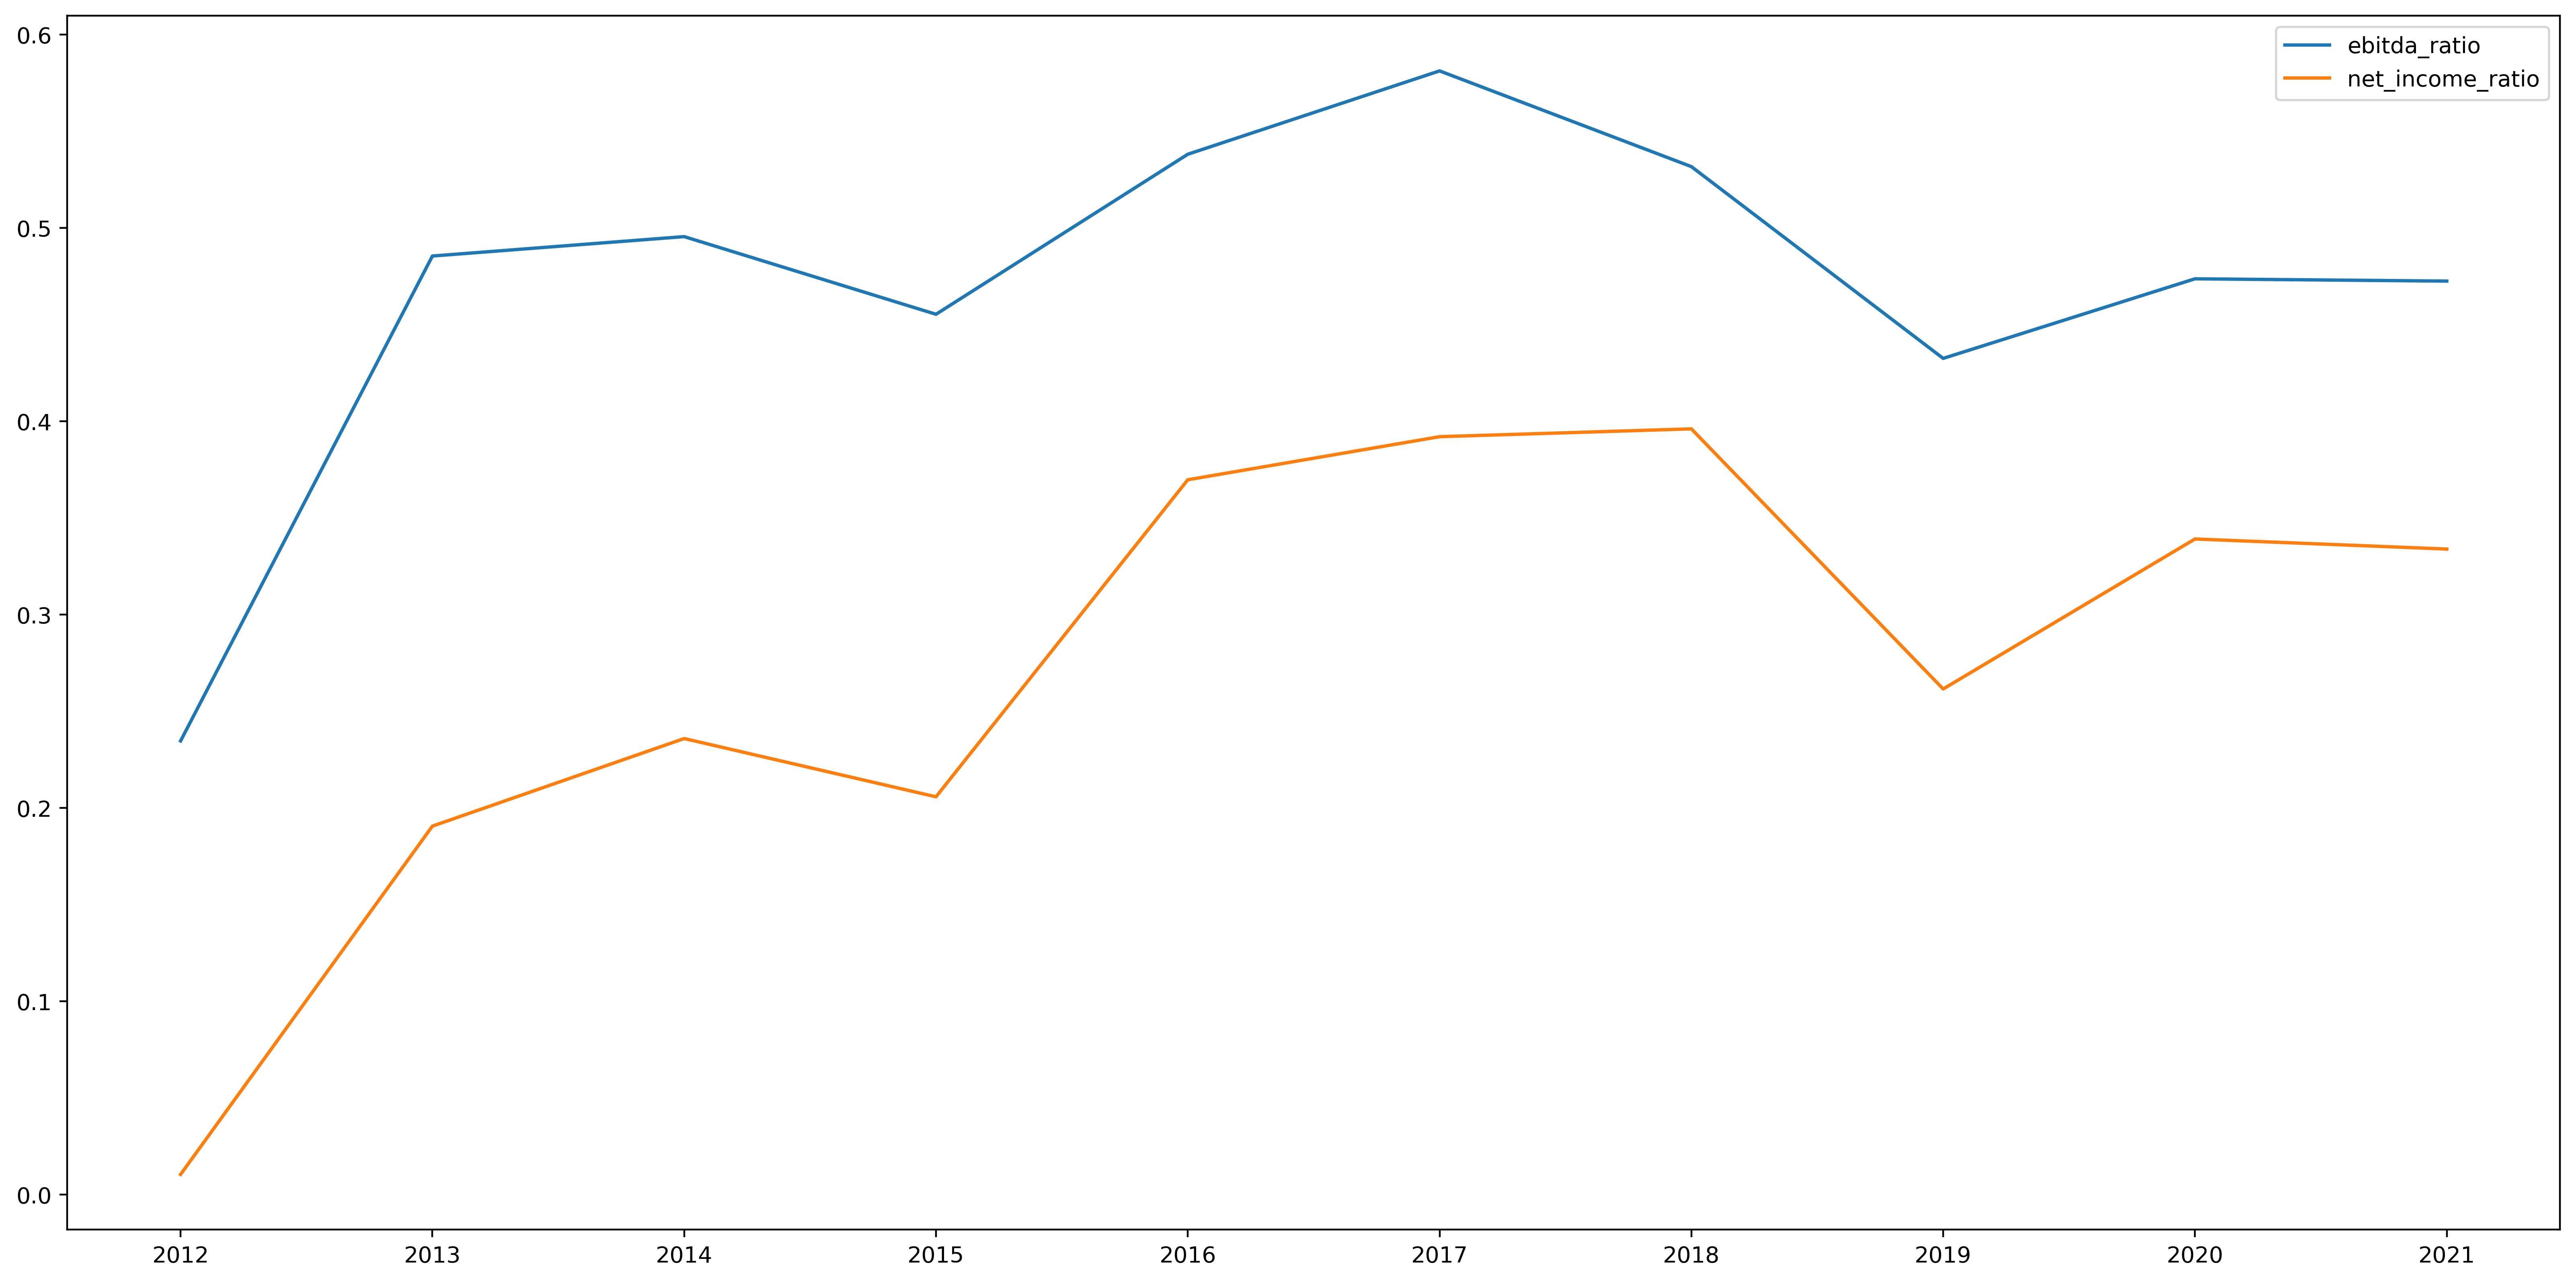

In [51]:
fig, ax = plt.subplots()
ax.plot('years', 'gross_profit_ratio', data=income_statement_df)

fig, ax = plt.subplots()
ax.plot('years', 'ebitda_ratio', data=income_statement_df)
ax.plot('years', 'net_income_ratio', data=income_statement_df)
ax.legend()

In [52]:
## pricing data
price = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/historical-price-full/META?apikey=d4277832337026f8e79417143061c25c")

/tmp/ipykernel_50/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



In [53]:
import plotly.graph_objects as go
# len(price['historical'])
price

df = pd.DataFrame(price['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-12-05,121.750000,124.670000,121.350000,122.430000,122.430000,35432496.0,35432496.0,0.68000,0.559,122.81667,"December 05, 22",0.00559
1,2022-12-02,117.830000,124.010000,117.620000,123.490000,123.490000,39812950.0,39812950.0,5.66000,4.804,121.70667,"December 02, 22",0.04804
2,2022-12-01,119.198000,121.200000,118.410000,120.440000,120.440000,35551142.0,35551142.0,1.24200,1.042,120.01667,"December 01, 22",0.01042
3,2022-11-30,109.540000,118.160000,109.380000,118.100000,118.100000,43351935.0,43351935.0,8.56000,7.814,115.21333,"November 30, 22",0.07814
4,2022-11-29,109.540000,110.940000,108.545000,109.460000,109.460000,23901352.0,23901352.0,-0.08000,-0.073,109.64833,"November 29, 22",-0.00073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2017-12-12,178.600006,179.179993,176.600006,176.960007,176.960007,16854098.0,16854098.0,-1.64000,-0.918,177.58000,"December 12, 17",-0.00918
1254,2017-12-11,179.300003,180.220001,178.800003,179.039993,179.039993,13168575.0,13168575.0,-0.26001,-0.145,179.35333,"December 11, 17",-0.00145
1255,2017-12-08,181.529999,182.279999,178.740097,179.000000,179.000000,19883764.0,19883764.0,-2.53000,-1.394,180.00670,"December 08, 17",-0.01394
1256,2017-12-07,175.800003,180.389999,175.800003,180.139999,180.139999,20404533.0,20404533.0,4.34000,2.469,178.77667,"December 07, 17",0.02469


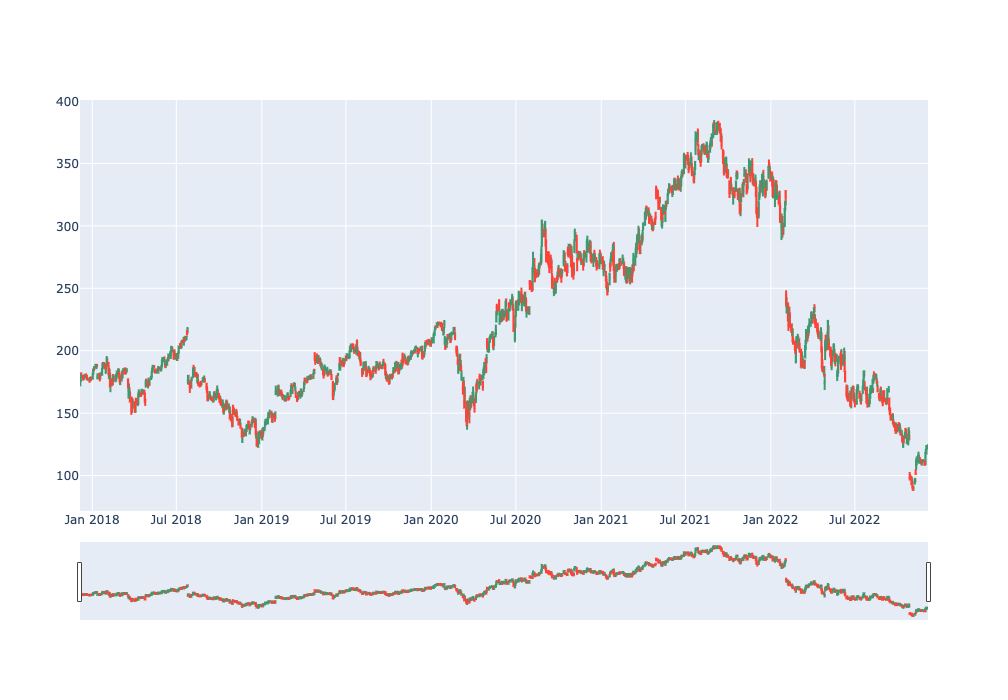

In [61]:
import plotly.express as px

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                      
                     ])

fig.update_layout(
    autosize=False,
    width=1000,
    height= 700,
)

fig.show()
